In [ ]:
#My probe: 832810578--> {'HPF', 'MB', 'POST', 'SCig', 'VISp'}, probeC 
#My experiment: 831882777

In [3]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

output_dir = '/home/maria/AllenData'
manifest_path = os.path.join(output_dir, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
session=cache.get_session_data(831882777)
lfp = session.get_lfp(832810578)
session.spike_times

/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1

{951084160: array([3.67089558e+00, 3.68666226e+00, 3.72166230e+00, ...,
        9.83854112e+03, 9.83857365e+03, 9.83858615e+03]),
 951084185: array([3.75509567e+00, 4.02876262e+00, 4.25346286e+00, ...,
        9.83833032e+03, 9.83841919e+03, 9.83860375e+03]),
 951088719: array([3.69359560e+00, 3.84729576e+00, 4.16516277e+00, ...,
        9.83774619e+03, 9.83787602e+03, 9.83813802e+03]),
 951084266: array([3.71109562e+00, 3.88879581e+00, 3.94396253e+00, ...,
        9.83802645e+03, 9.83819289e+03, 9.83834579e+03]),
 951084348: array([3.69926227e+00, 3.78779570e+00, 4.02522928e+00, ...,
        9.83848745e+03, 9.83852615e+03, 9.83858119e+03]),
 951084373: array([3.80526239e+00, 3.82776241e+00, 3.83582908e+00, ...,
        9.83850732e+03, 9.83854025e+03, 9.83856769e+03]),
 951084383: array([3.67312891e+00, 4.21209615e+00, 4.91509689e+00, ...,
        9.82843198e+03, 9.83364478e+03, 9.83373358e+03]),
 951084437: array([3.65099556e+00, 3.68396226e+00, 3.69386227e+00, ...,
        9.83846175

In [39]:
def get_units(session, probe):
    units=session.units[session.units['probe_description']==probe].index
    return units

units=get_units(session, 'probeC') 

def get_spike_times(session, units):
    all_spikes=[]
    for u in units:
        spike_times = session.spike_times[u]
        all_spikes.append(spike_times)
    return all_spikes

spike_times=get_spike_times(session, units)

In [7]:
spike_times

[array([3.69501594e+00, 3.71658261e+00, 3.75531594e+00, ...,
        9.83838938e+03, 9.83841742e+03, 9.83852572e+03]),
 array([ 134.93377552,  136.10680879,  136.40857544, ..., 9833.47898523,
        9833.56911856, 9833.65978523]),
 array([3.71728261e+00, 3.85171593e+00, 3.92624926e+00, ...,
        9.83833408e+03, 9.83847205e+03, 9.83858035e+03]),
 array([3.77548261e+00, 4.43394924e+00, 1.00847156e+01, ...,
        9.83818478e+03, 9.83819222e+03, 9.83847868e+03]),
 array([3.70038261e+00, 3.74674927e+00, 3.74938261e+00, ...,
        9.83065575e+03, 9.83067835e+03, 9.83500949e+03]),
 array([3.67921594e+00, 3.68808261e+00, 3.73748261e+00, ...,
        9.83835928e+03, 9.83846672e+03, 9.83859425e+03]),
 array([  21.34958166,   24.59324815,   36.26734752, ..., 9838.19988498,
        9838.50868496, 9838.57888496]),
 array([3.77684927e+00, 3.86568260e+00, 4.04274926e+00, ...,
        9.83818078e+03, 9.83846372e+03, 9.83847835e+03]),
 array([7.09308243e+00, 1.30962154e+01, 2.93077812e+01, ...,

In [14]:
np.diff(lfp.time)
lfp.time
(0.25)/0.0008

312.5

In [17]:
signal=lfp[1024:1024+313]

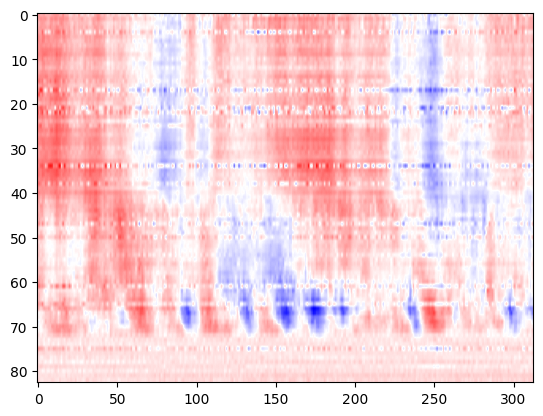

In [23]:
import matplotlib.pyplot as plt
signal=lfp[3000:3000+313]
plt.imshow(signal.T, aspect='auto', cmap='bwr')

In [ ]:
def get_random_data_for_one_pair(lfp, spike_times):
    times=lfp.time
    random_time=np.random.choice(times, 1)
    lfp_ind=np.where(times==random_time)[0][0]
    upper_bound_time=random_time+0.25
    spikes_in_window=[spike_times[i] for i in range(len(spike_times)) if spike_times[i]>random_time and spike_times[i]<upper_bound_time]
    bin_size=0.01
    #Write code to bin spikes here
    lfp_in_window=lfp[lfp_ind:lfp_ind+313]
    return lfp_in_window, spikes_in_window

In [32]:
import numpy as np

def get_random_data_for_one_pair(lfp, spike_times):
    """
    Selects a random time window from the LFP data and bins the spike times within that window.

    Parameters:
    - lfp (array-like): The LFP signal array with a 'time' attribute.
    - spike_times (array-like): Array of spike timestamps.

    Returns:
    - lfp_in_window (numpy.ndarray): LFP data within the selected time window.
    - binned_spikes (numpy.ndarray): Spike counts per bin within the time window.
    """
    # Extract the time array from LFP data
    times = lfp.time[:-313]  # Assuming lfp.time is a numpy array of timestamps

    # Ensure that the LFP time and spike times are numpy arrays for efficient indexing
    times = np.array(times)
    spike_times = np.array(spike_times)

    # Select a random start time from the LFP time array
    random_time = np.random.choice(times)
    
    # Define the window duration (e.g., 0.25 seconds)
    window_duration = 0.25  # seconds
    upper_bound_time = random_time + window_duration

    # Ensure that the upper bound does not exceed the LFP recording duration
    if upper_bound_time > times[-1]:
        random_time = times[-1] - window_duration
        upper_bound_time = times[-1]

    # Find the index corresponding to the random_time
    # Using searchsorted for efficient indexing
    lfp_ind = np.searchsorted(times, random_time)

    # Extract LFP data within the window
    # Assuming LFP sampling rate is consistent and matches the window duration
    # For example, if sampling rate is 1252 Hz, 0.25 seconds corresponds to 313 samples
    # Adjust the number of samples (e.g., 313) based on your actual sampling rate
    num_samples = 313  # Replace with int(window_duration * sampling_rate) if known
    lfp_in_window = lfp[lfp_ind:lfp_ind + num_samples]

    # Extract spikes within the time window
    # Using boolean indexing for efficient spike extraction
    spikes_in_window = spike_times[(spike_times[i] > random_time) & (spike_times[i] < upper_bound_time) for i in range(len(spike_times))]
    print(spikes_in_window)

    # Define binning parameters
    bin_size = 0.01  # 10 ms
    num_bins = int(window_duration / bin_size)

    # Create bin edges from random_time to upper_bound_time
    bins = np.linspace(random_time, upper_bound_time, num_bins + 1)

    # Bin the spikes using numpy.histogram
    binned_spikes, _ = np.histogram(spikes_in_window, bins=bins)

    return lfp_in_window.T, binned_spikes

lfp_in_window, binned_spikes = get_random_data_for_one_pair(lfp, spike_times[0])

SyntaxError: invalid syntax (2610530698.py, line 47)

(313, 83)


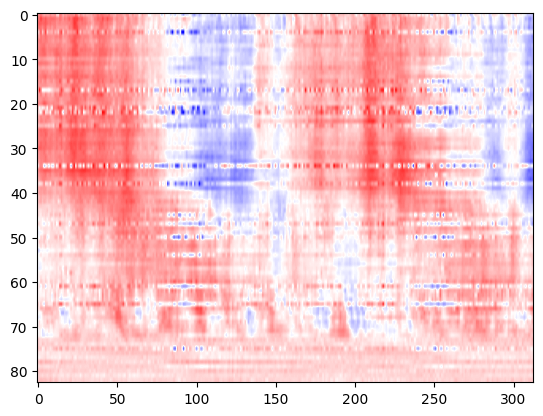

In [27]:
plt.imshow(lfp_in_window.T, aspect='auto', cmap='bwr')
print(lfp_in_window.shape)

In [29]:
print(binned_spikes[0].shape)

()


In [30]:
print(len(spike_times))

86


In [42]:
import numpy as np

def get_random_data_for_one_pair(lfp, spike_times, window_duration=0.25, bin_size=0.01, sampling_rate=1252):
    """
    Selects a random time window from the LFP data and bins the spike times within that window for each unit.

    Parameters:
    - lfp (array-like): The LFP signal array with a 'time' attribute.
    - spike_times (list of numpy.ndarray): List containing spike time arrays for each unit.
    - window_duration (float): Duration of the time window in seconds (default: 0.25).
    - bin_size (float): Size of each bin in seconds for spike counting (default: 0.01).
    - sampling_rate (int): Sampling rate of the LFP in Hz (default: 1252).

    Returns:
    - lfp_in_window (numpy.ndarray): LFP data within the selected time window.
    - binned_spikes (numpy.ndarray): 2D array of spike counts per unit per bin within the window.
    """
    # Extract the time array from LFP data
    times = np.array(lfp.time)  # Assuming lfp.time is a numpy array of timestamps

    # Select a random start time ensuring the window fits within the LFP data
    random_time = np.random.uniform(low=times[0], high=times[-1] - window_duration)
    upper_bound_time = random_time + window_duration

    # Find the index corresponding to the random_time using searchsorted for efficiency
    lfp_ind = np.searchsorted(times, random_time)

    # Calculate the number of samples based on the sampling rate and window duration
    num_samples = int(window_duration * sampling_rate)  # e.g., 0.25 * 1252 ≈ 313 samples
    lfp_in_window = lfp[lfp_ind:lfp_ind + num_samples]  # Assuming lfp.signal contains the LFP data

    # Initialize a list to hold binned spike counts for each unit
    binned_spikes_list = []

    # Define bin edges for the spike histogram
    num_bins = int(window_duration / bin_size)
    bins = np.linspace(random_time, upper_bound_time, num_bins + 1)

    print(spike_times)
    # Iterate over each unit's spike times and bin the spikes within the window
    for unit_spike_times in spike_times:
        print(unit_spike_times)
        # Extract spikes within the current window for this unit
        spikes_in_window = unit_spike_times[(unit_spike_times > random_time) & (unit_spike_times < upper_bound_time)]
        print(spikes_in_window)
        # Bin the spikes using numpy.histogram
        spike_counts, _ = np.histogram(spikes_in_window, bins=bins)
        
        # Append the spike counts to the list
        binned_spikes_list.append(spike_counts)
    
    # Convert the list of spike counts to a 2D numpy array (units x bins)
    binned_spikes = np.array(binned_spikes_list)  # Shape: (82, 25) for 82 units and 25 bins

    return lfp_in_window, binned_spikes

lfp_in_window, binned_spikes = get_random_data_for_one_pair(lfp, spike_times)

[array([3.69501594e+00, 3.71658261e+00, 3.75531594e+00, ...,
       9.83838938e+03, 9.83841742e+03, 9.83852572e+03]), array([ 134.93377552,  136.10680879,  136.40857544, ..., 9833.47898523,
       9833.56911856, 9833.65978523]), array([3.71728261e+00, 3.85171593e+00, 3.92624926e+00, ...,
       9.83833408e+03, 9.83847205e+03, 9.83858035e+03]), array([3.77548261e+00, 4.43394924e+00, 1.00847156e+01, ...,
       9.83818478e+03, 9.83819222e+03, 9.83847868e+03]), array([3.70038261e+00, 3.74674927e+00, 3.74938261e+00, ...,
       9.83065575e+03, 9.83067835e+03, 9.83500949e+03]), array([3.67921594e+00, 3.68808261e+00, 3.73748261e+00, ...,
       9.83835928e+03, 9.83846672e+03, 9.83859425e+03]), array([  21.34958166,   24.59324815,   36.26734752, ..., 9838.19988498,
       9838.50868496, 9838.57888496]), array([3.77684927e+00, 3.86568260e+00, 4.04274926e+00, ...,
       9.83818078e+03, 9.83846372e+03, 9.83847835e+03]), array([7.09308243e+00, 1.30962154e+01, 2.93077812e+01, ...,
       9.835880

In [46]:
print(lfp_in_window.shape)

(313, 83)


In [43]:
binned_spikes.shape

(86, 25)

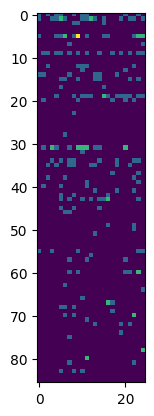

In [45]:
plt.imshow(binned_spikes)